In [6]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
# Anomaly detection algorithm using guassian dirtibution formula
# for a 2 feature dataset
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


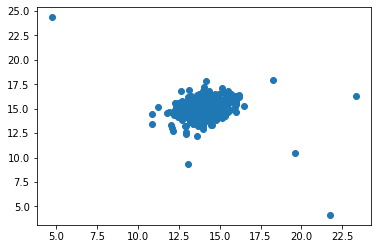

In [7]:
# file = pd.read_excel('ex8data1.xlsx', sheet_name='X', header=None)
file = pd.read_excel('ex8data1.xlsx', sheet_name='X', header=None)

# print(file) # prints the dataset

# Plot the dataset on a 2D graph using the matplotlib.pyplot library
plt.figure()
plt.scatter(file[0], file[1])  # 1st column as x-axis and 2nd column as y-axis
plt.show()


In [14]:
class guassian_algorithm:
    def __init__(self):
        self.int = 0

    def calc_probability(self, file):
        total_records = len(file)  # total number of rows or data points
        sum = np.sum(file, axis=0)  # sum of all the values n first column and second column separately
        mean = sum/total_records  # mean of both the columns

        variance_denominator = np.sum((file - mean)**2, axis=0)
        variance_square = variance_denominator/mean  # It is important to note it is variance

        variance_diag = np.diag(variance_square)  # diagonal values of the variance
        variance_sq_determinant = np.linalg.det(variance_diag)  # compute the determinant

        mean_len = len(mean)
        X = file - mean

        # Guassian's formula
        prob = 1/((2*np.pi)**(mean_len/2)*(variance_sq_determinant**0.5))*np.exp(-0.5* np.sum(X @ np.linalg.pinv(variance_diag) * X, axis=1))

        # np.linalg.pinv computes sudo inverse of matrix
        # credit for above line:
        # https://towardsdatascience.com/a-complete-anomaly-detection-algorithm-from-scratch-in-python-step-by-step-guide-e1daf870336e

        return prob

    def calc_tf_fp_fn(self, prob_x, epsilon, file_cv):  # This is a function to find true positives, false positives and false negatives
        truePositive, falsePositive, falseNegative = 0, 0, 0
        # print(file_cv)
        for i in range(0, len(file_cv)):
            # if the probability of item at index 'i' is less than the epsilon and it has is anomalous item then
            # increase the true positives by one
            # this means that our training model was able to detect anomalous; which is good
            if prob_x[i] <= epsilon and file_cv[i][0] == 1:
                truePositive += 1

            # if the probability of item at index 'i' is less than the epsilon  but it is not an anomalous point then
            # that is not good, this is where my training model is wrong which means it is flagging an item which is
            # non anomalous as anomalous
            elif prob_x[i] <= epsilon and file_cv[i][0] == 0:
                falsePositive += 1

            # This basically means that my training model is says a point is not anomalous but it should be
            elif prob_x[i] > epsilon and file_cv[i][0] == 1:
                falseNegative += 1

        return truePositive, falsePositive, falseNegative

    def f_score(self, epsilon, prob_x, file_cv):

        # For more information on f-score:
        # credit: https://towardsdatascience.com/a-complete-understanding-of-precision-recall-and-f-score-concepts-23dc44defef6

        # To calculate the f-score we first need to calculate truePositive, falsePositive, falsePositive
        # values of the list
        truePositive, falsePositive, falseNegative = self.calc_tf_fp_fn(prob_x, epsilon, file_cv)

        # print(truePositive, falsePositive, falseNegative)
        precision_value = truePositive / (truePositive + falsePositive)
        recall = truePositive / (truePositive + falseNegative)

        f_score_value = (2*precision_value*recall) / (precision_value + recall)

        return f_score_value

    def algorithm(self):
        # total_records = len(self.file)  # total number of rows or data points
        # sum = np.sum(file, axis=0)  # sum of all the values n first column and second column separately
        # mean = sum/total_records  # mean of both the columns
        #
        # variance_denominator = np.sum((file - mean)**2, axis=0)
        # variance_square = variance_denominator/mean  # It is important to note it is variance square
        #
        # variance_diag = np.diag(variance_square)  # diagonal values of the variance
        # variance_sq_determinant = np.linalg.det(variance_diag) # compute the determinant
        #
        # mean_len = len(mean)
        # X = file - mean
        # prob = 1/((2*np.pi)*(variance_sq_determinant**0.5))*np.exp(-0.5*np.sum(X @ np.linalg.pinv(variance_diag)*X, axis=1))
        # # np.linalg.pinv computes sudo inverse of matrix
        # # credit for above line:
        # # https://towardsdatascience.com/a-complete-anomaly-detection-algorithm-from-scratch-in-python-step-by-step-guide-e1daf870336e


        # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
        # Excel file used in this example has 3 sheets (X, Xval & y)
        # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

        # Read the file using panda library function

        # Read the main sheet i.e. 
        file_x = pd.read_excel('ex8data1.xlsx', sheet_name='X', header=None)
        # print(file_x)
        prob_x = self.calc_probability(file_x)

        # prob_x.describe()
        print("****")

        # Read the cross-validation data
        # Credit: https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwiTmOzFh8PtAhUWuZ4KHRioAcMQFjADegQICBAC&url=https%3A%2F%2Fmachinelearningmastery.com%2Fk-fold-cross-validation%2F&usg=AOvVaw3dq5uCuxWnEEzbZGBP5vK2
        # Why do we need cross validation data?
        # Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning
        # model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to
        # perform in general when used to make predictions on data not used during the training of the model

        # here we are going to ead the cross validation data to calculate the probability
        file_cv = pd.read_excel('ex8data1.xlsx', sheet_name='Xval', header=None)
        prob_cv = self.calc_probability(file_cv)

        # This will give some statistical figures on the data that we have
        # print(prob_cv.describe())
        print("****")


        # Read labels file
        # Labels file is used as the ground truth to check if the training model is working good or not
        file_label = pd.read_excel('ex8data1.xlsx', sheet_name='y', header=None)
        array_label = np.array(file_label)  # converting it into array or easy calculations later


        # # # # # #
        # if you want to change the parameters of probability to see how the plot changes based on value
        # multiply prob_cv.mean() by a factor and it will change the plot
        # # # # # #

        # list of with probability less than or equal to the threshold
        epsilon_list = [item for item in prob_cv if item <= prob_cv.mean()]  # list of items with value probability
        # less than mean value of all probability

        print(prob_cv.mean())
        print(len(epsilon_list))


        # The F-score, also called the F1-score, is a measure of a model's accuracy on a dataset
        # https://deepai.org/machine-learning-glossary-and-terms/f-score

        # here we will calculate the f score list
        f_score_list = []  # f-score value of every item
        for item in epsilon_list:
            f_score_list.append(self.f_score(item, prob_cv, array_label))

        # print(len(f_score_list))

        max_fscore_index = np.array(f_score_list).argmax()

        max_fscore_epsilon = epsilon_list[max_fscore_index]

        anomaly_List = []  # This list will contain 0 or 1 value and that will tell if an item is anomalous or not
        # if there is 0 at index i then that means the point is normal
        # if there is 1 at index i then that means the point is anomalous

        for i in range(0, len(file_x)):
            if prob_x[i] <= max_fscore_epsilon:
                anomaly_List.append(1)
            else:
                anomaly_List.append(0)


        file_x['label'] = np.array(anomaly_List)

        # plotting graph with anomalies
        plt.figure()
        # plt.scatter(prob_x[0], prob_x[1])

        print(file_x)
        for index, row in file_x.iterrows():
            # print(row['label'])
            if int(row['label']) == 1:
                # print("******\n", row, "\n")
                plt.scatter(row[0], row[1], color='red')
            else:
                plt.scatter(row[0], row[1], color='blue')
        plt.show()

****
****
0.0035997951897921445
68
             0          1  label
0    13.046815  14.741152      0
1    13.408520  13.763270      0
2    14.195915  15.853181      0
3    14.914701  16.174260      0
4    13.576700  14.042849      0
..         ...        ...    ...
302  12.476629  14.459370      0
303  19.582573  10.411619      1
304  23.339868  16.298874      1
305  18.261188  17.978309      0
306   4.752613  24.350407      1

[307 rows x 3 columns]


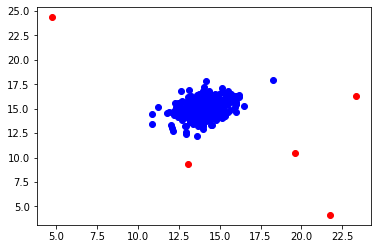

In [15]:
ga_obj = guassian_algorithm()
ga_obj.algorithm()
